# Test preparation

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from qcodes.utils.validators import Numbers
from qcodes.instrument import Parameter
from tools import *
from random import random, gauss
import numpy as np

In [3]:
def dummyset(voltage):
    return voltage


def dummyget():
    return gauss(10,5)


In [4]:
I_sd = Parameter(name='I_sd', label='SET current', unit='A', set_cmd=None, get_cmd=dummyget)
v_sd = Parameter(name='v_sd', label='SET sd', unit='V', initial_value=0,
                 set_cmd=dummyset, get_cmd=None, vals=Numbers(max_value=1, min_value=-1))
v_g1 = Parameter(name='v_g1', label='Gate 1', unit='V', initial_value=0,
                 set_cmd=dummyset, get_cmd=None, vals=Numbers(max_value=1, min_value=-1))

In [5]:
scan_range = np.linspace(-1, 1, 100)

In [6]:
my_manager = DataManager(run_id=3)

In [7]:
my_logger = Logger(mkor4k='mk',
                   sample_name='DummyTest',
                   tester='xf')

# scan v.1.1 test (abandoned)

In [8]:
my_scan = Scan(para_meas=I_sd,
               para_scan=v_sd,
               range_scan=scan_range,
               data_manager=my_manager,
               logger=my_logger,
               scaler=1e9)

In [9]:
my_scan.scan_1d(range_scan_x=0)


Start experimental run with id:1 idz:0 idx:99 --- 0.2856 nA [##################################################]100.0%

{'text': 'scan',
 'subtitle': 'id:1 D:/Data/2023-09-21/\n16-38-46 --- 16-38-47\nproject name: DummyTestmktest, tester: xf',
 'comment': ''}

# Scan v.1.2 test


In [8]:
my_scan = Scan(para_meas=I_sd,
               para_scan=[v_sd,v_g1],
               data_manager=my_manager,
               logger=my_logger,
               scaler=1e9)

In [9]:
my_scan.set_range_1d(scan_range)

In [10]:
my_scan._ranges

{'scan_1d': [array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
         -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
         -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
         -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
         -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
         -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
         -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
         -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
         -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
         -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
          0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
          0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
          0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
          0.31313131,  0.33

In [11]:
my_scan.scan_1d(scan_x=1)

Start experimental run with id:4 idy:None idz:0 idx:99 --- 9.1367 nA [########################################]100.0%

{'text': 'scan',
 'subtitle': 'id:4 C:/Data/2023-10-10/\n20-35-15 --- 20-35-17\nproject name: DummyTestmktest, tester: xf',
 'comment': ''}

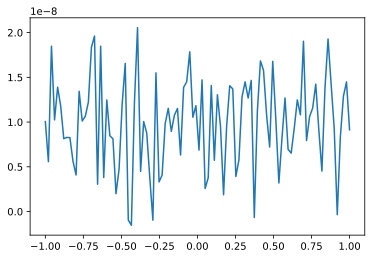

In [12]:
plt.plot(scan_range, my_scan.data[0,:])

In [13]:
scan_x_range = np.linspace(-0.1, 0.1, 100)
scan_y_range = np.linspace(-0.1, 0.1, 10)

In [14]:
my_scan.set_range_2d(scan_x_range, scan_y_range)

In [15]:
my_scan.scan_2d(scan_x=1,scan_y=0)

Start experimental run with id:5 idy:9 idz:0 idx:99 --- 8.0722 nA [########################################]100.0%%

{'text': 'scan',
 'subtitle': 'id:5 C:/Data/2023-10-10/\n20-44-40 --- 20-44-52\nproject name: DummyTestmktest, tester: xf',
 'comment': ''}

In [16]:
my_manager.id

5

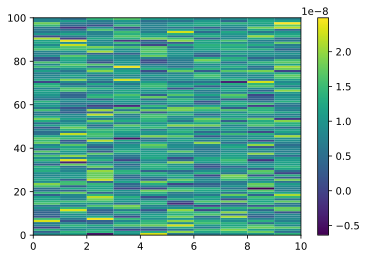

In [17]:
plt.pcolormesh(my_scan.data[0,:,:])
plt.colorbar()

## Running time analysis

In [58]:
from line_profiler import LineProfiler

In [59]:
profile = LineProfiler(my_scan.scan_2d)

In [60]:
profile.runcall(my_scan.scan_2d, 1, 0)
profile.print_stats()

Start experimental run with id:9 idy:99 idz:0 idx:99 --- 20.5489 nA [########################################]100.0%Timer unit: 1e-07 s

Total time: 471.246 s
File: C:\Users\Yoonaxf\PycharmProjects\qcodes\tools\scan.py
Function: scan_2d at line 259

Line #      Hits         Time  Per Hit   % Time  Line Contents
   259                                                       self.logger.write(end_msg)



In [61]:
profile = LineProfiler(my_scan.scan_1d)
profile.runcall(my_scan.scan_1d, 1)
profile.print_stats()

Start experimental run with id:10 idy:None idz:0 idx:99 --- 8.2208 nA [########################################]100.0%Timer unit: 1e-07 s

Total time: 4.65176 s
File: C:\Users\Yoonaxf\PycharmProjects\qcodes\tools\scan.py
Function: scan_1d at line 126

Line #      Hits         Time  Per Hit   % Time  Line Contents
   126                                                       raise IndexError('Only one-dimensional data is accepted!')



In [108]:
import h5py
import time
from collections import Iterable

def acqusition_generator(para_meas):
    for vz in my_can.para_meas:
        yield vz()
    
def safe(parameter, endpoint):
    if isinstance(parameter, Iterable):
        for element in parameter:
            ramp(element, endpoint)
    else:
        ramp(parameter, endpoint)

def ramp(parameter, endpoint, step=0.01):
    if endpoint > 50 or step == 0:
        pass
    else:
        start_point = parameter()
        if start_point > endpoint:
            step = -step 
        interval = np.arange(start_point, endpoint, step)
        for val in interval:
            parameter(val)
            time.sleep(0.005)
    parameter(endpoint)
def output(parameter, val):
    if isinstance(parameter, Iterable):
        for element in parameter:
            element(val)
    else:
        parameter(val)
def scan_2d(scan_x: int, scan_y: int):
    scan_type = 'scan_2d'
    scan_para_list=[scan_x, scan_y]
    ranges = my_scan._ranges[scan_type]
    scan_para = [my_scan.para_scan[para] for para in scan_para_list]
    if len(ranges) == len(scan_para):
        my_scan.data = np.zeros((len(my_scan.para_meas),) + my_scan.range_scan_dimension(ranges))
    else:
        raise ValueError('scan_para_list is out of range and it does not match the scan range.')
    my_scan.manager.update_run_id()
    data_file = my_scan.manager.create_hdf5_file
    with h5py.File(data_file, 'a') as file:

        dataset = my_scan.scan_dataset(file, ranges)

        start_time = my_scan.scan_start(scan_para, ranges)

#         my_scan.scan_action(range_2d, scan_xy_para, dataset)
        if len(ranges) == 1:
#             self.scan_action_1d(ranges, scan_para_list, dataset)
            for idx, vx in enumerate(ranges[0]):
                output(scan_para[0], vx)
                time.sleep(my_scan.sleep)
                for idz, vz in enumerate(my_can.para_meas):
                    raw_data = vz() / my_scan.scaler
                    my_scan.data[idz, idx] = np.average(raw_data)
                    # ------------------------------------------------------------------------------------------------------
                    my_scan.manager.progress_bar(current=my_scan.data[idz, idx],
                                              idx=idx,
                                              idz=idz,
                                              length=len(ranges[0]))
                # ----------------------------------------------------------------------------------------------------------
                dataset[:, idx] = my_scan.data[:, idx]
        elif len(ranges) == 2:
#             self.scan_action_2d(ranges, scan_para_list, dataset)
            for idy, vy in enumerate(ranges[1]):
                safe(scan_para[0], ranges[0][0])
                output(scan_para[1], vy)
                for idx, vx in enumerate(ranges[0]):
                    output(scan_para[0], vx)
                    time.sleep(my_scan.sleep)
                    for idz, vz in enumerate(my_scan.para_meas):
                        raw_data = vz() / my_scan.scaler
                        my_scan.data[idz, idx, idy] = np.average(raw_data)
                        my_scan.manager.progress_bar(current=my_scan.data[idz, idx, idy],
                                                  idy=idy,
                                                  idx=idx,
                                                  idz=idz,
                                                  length=len(ranges[0]))

                dataset[:, :, idy] = my_scan.data[:, :, idy]
        else:
            raise ValueError('The dimension of scan ranges excesses two !')
            
        end_time = my_scan.scan_end(scan_para)

        notes = my_scan.generate_notes(start_time, end_time)

        for key in notes.keys():
            dataset.attrs[key] = notes[key]

    return notes

In [109]:
profile = LineProfiler(scan_2d)
profile.runcall(scan_2d, 1, 0)
profile.print_stats()

Start experimental run with id:23 idy:9 idz:0 idx:99 --- 11.6672 nA [########################################]100.0%Timer unit: 1e-07 s

Total time: 18.9099 s
File: C:\Users\Yoonaxf\AppData\Local\Temp\ipykernel_28192\3855196544.py
Function: scan_2d at line 28

Line #      Hits         Time  Per Hit   % Time  Line Contents
    28                                           def scan_2d(scan_x: int, scan_y: int):
    29         1          7.0      7.0      0.0      scan_type = 'scan_2d'
    30         1          6.0      6.0      0.0      scan_para_list=[scan_x, scan_y]
    31         1         20.0     20.0      0.0      ranges = my_scan._ranges[scan_type]
    32         1         45.0     45.0      0.0      scan_para = [my_scan.para_scan[para] for para in scan_para_list]
    33         1         10.0     10.0      0.0      if len(ranges) == len(scan_para):
    34         1        164.0    164.0      0.0          my_scan.data = np.zeros((len(my_scan.para_meas),) + my_scan.range_scan_dimens

# Code test

In [112]:
from sys import getsizeof
def show_memory(unit='KB', threshold=1):
    '''查看变量占用内存情况

    :param unit: 显示的单位，可为`B`,`KB`,`MB`,`GB`
    :param threshold: 仅显示内存数值大于等于threshold的变量
    '''
    scale = {'B': 1, 'KB': 1024, 'MB': 1048576, 'GB': 1073741824}[unit]
    for i in list(globals().keys()):
        memory = eval("getsizeof({})".format(i)) // scale
        if memory >= threshold:
            print(i, memory)

In [111]:
a = [i for i in range(10000)]
show_memory()

_ih 1
_oh 1
In 1
Out 1
_i 1
_iii 3
Numbers 1
Parameter 1
Scan 1
DataManager 1
Logger 1
File_path 1
LineProfiler 1
_i62 1
_i64 1
_i66 1
_i68 1
_i70 1
_i72 1
_i74 1
_i76 1
_i80 3
_i82 3
_i84 3
_i86 3
_i88 3
_i90 3
a 83
_i102 3
_i104 3
_i108 3
_i110 1


In [115]:
getsizeof(a)//1024

83

In [116]:
getattr(my_scan, 'scan_action')

<bound method Scan.scan_action of <tools.scan.Scan object at 0x0000023DB346B760>>

In [119]:
def count_down(n):
    while n >= 0:
        newn = yield n
        print('newn', newn)
        if newn:
            print('if')
            n = newn
            print('n =', n)
        else:
            n -= 1
cd = count_down(5)
for i, v in enumerate(cd):
    print(i, ',')
    print(v, ',')
    if i == 5:
        cd.send(3)

0 ,
5 ,
newn None
1 ,
4 ,
newn None
2 ,
3 ,
newn None
3 ,
2 ,
newn None
4 ,
1 ,
newn None
5 ,
0 ,
newn 3
if
n = 3
newn None
6 ,
2 ,
newn None
7 ,
1 ,
newn None
8 ,
0 ,
newn None


In [122]:
def to_uppercase(func):
    text = func()
    if not isinstance(text,str):
        raise TypeError('Not a string type')
    return text.upper()

@to_uppercase
def say():
    return 'hello'

In [124]:
say

'HELLO'

## Data acquisition

In [50]:
import artdaq

class ACQTask:
    __slots__='read','__dict__'
    def __init__(self, acq_name: str):
        self.acq = acq_name
        self._acq_controller = {'art':self.art, 'm2p':self.m2p}

    def __enter__(self):
        self.read = self._acq_controller[self.acq]()
        return self
    
    @classmethod
    def get_acq(cls, acq_name):
        return getattr(cls,acq_name)
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.close()
    
    @staticmethod
    def art():
#         task = artdaq.Task()
#         task.ai_channels.add_ai_voltage_chan(f"Dev1/ai0:3")
#         task.timing.cfg_samp_clk_timing(sr, sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=int(memsize))
        return dummyget
    
    @staticmethod
    def m2p():
        return dummyget
    
    def close(self):
        print('close')

In [52]:
with ACQTask('m2p') as task:
    print(dir(task))
    for ii in range(4):
        print(task.read())

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_acq_controller', 'acq', 'art', 'close', 'get_acq', 'm2p', 'read']
8.044336108429293
12.576223245970494
12.739961610010765
12.474440090111278
close
